In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

''' This file is for exploratory data analysis. I start by cleaning all the tweets up so they're easy to sift through, 
then I perform EDA to fully understand my data before I begin modeling. ''' 

In [4]:
def ReadCsv(data_path): 
    
    ## Read the ddataframe
    ## make sure the text is in type string 

    data = pd.read_csv(data_path)
    data.text = data.text.astype(str) 
    if data_path == 'train.csv': 
        data.text = data.selected_text.astype(str) 
    return data

train = ReadCsv('train.csv') 
test = ReadCsv('test.csv') 

In [5]:

def FindNA(train, test): 

    ## See if there are any null values

    print('\n train \n ')
    print(train.isna().sum())
    print('\n test \n ')
    print(test.isna().sum())


FindNA(train, test) 


 train 
 
textID           0
text             0
selected_text    1
sentiment        0
dtype: int64

 test 
 
textID       0
text         0
sentiment    0
dtype: int64


In [6]:
## We can see there is one null variable in the train model, so we are going to remove it. 

train.dropna(inplace = True) 

FindNA(train, test) 


 train 
 
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

 test 
 
textID       0
text         0
sentiment    0
dtype: int64


In [7]:
def FindJaccard(data): 

    ## Itterates through all the rows and calculates the jaccard score. 

    

    def CalculateJaccard(s1, s2): 

        ## Function to find the individual Jaccard Scores

        length_string1 = len(s1) 
        length_string2 = len(s2) 
        length_intersection = len(set(s1).intersection(s2)) 
        return length_intersection / (length_string1 + length_string2 - length_intersection )  

    results_jaccard = []

    for ind, row in data.iterrows(): 
        sentence = row.text 
        phrase = row.selected_text

        jaccard_score = CalculateJaccard(sentence, phrase) 
        results_jaccard.append([sentence, phrase, jaccard_score]) 

    jaccard = pd.DataFrame(results_jaccard, columns = ['text', 'selected_text', 'jaccard_score'] ) 
    
    return data.merge(jaccard, how = 'outer')  


In [8]:
## Cleaning the Tweets 

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re

In [9]:
def RemoveStopWords(text): 

    ## Remove the stop words using the nltk package. 
    
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return ' '.join(tokens_without_sw )


In [10]:
def CleanText(text): 

    ## Clean up the tweets (punctuation, websites) using the re package
    ## Remove urls, remove punctuation, unecessary spaces, etc 

    text = str(text).lower() 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('https:', '', text)
    text = re.sub("[-'.,)(#<!:/?]", '', text)
    text = RemoveStopWords(text) 
    print(text) 
    return text

In [11]:
## Clean the text in the tweets

train['clean_text'] = train.text.apply(lambda x: CleanText(x))

test['clean_text'] = test.text.apply(lambda x: CleanText(x) )

train.head()

t size 40 ` straight post office see later
tell hasnt miss boge
_possa happy happy bday baby girl love hope get everything
haha realised sounded lot like stellllaaa lol anyhoo got ur facebook msg start working soon hopefully
ok love girls work beckons back later twpp
sounds like jeff best job world
spent hour trying get newborn bird front garden fly poor baby success
someone ` feel good
good morning people great day
see twitted real xmsirius let know contact info lets transmit
wish could twitter book expo reception javitz horrible
100000 60 = 1667 wordsday 1667 10 = 167 wordshour 167 60 = 28 wordsminute pressure
august anberlin ` headlining though yes perth show
got new clothes series supernatural dvd
shout nikkipleassseee soulja boy tell ` live live >
love google ` mothers day theme
_tha lol congrats
tea stressin
woah ` cool landed london 2 and12 hours agoi love scenery beautiful
thats terrible enjoy every minute
oh jealous though ` missing fried potato bread
vile people remove things

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,` responded going
1,549e992a42,Sooo SAD,Sooo SAD,negative,sooo sad
2,088c60f138,bullying me,bullying me,negative,bullying
3,9642c003ef,leave me alone,leave me alone,negative,leave alone
4,358bd9e861,"Sons of ****,","Sons of ****,",negative,sons * * * *


In [12]:
def NumberCharacters(data): 

    ## Find the number of characters and words in the tweets

    data['number_characters'] = data.text.str.len()
    data['number_clean_characters'] = data.clean_text.str.len()
    data['word_tokens'] = data.text.str.split()
    data['word_token_count'] = data.word_tokens.str.len() 
    data['clean_word_tokens'] = data.clean_text.str.split()
    data['clean_word_tokens_count'] = data.clean_word_tokens.str.len() 
    return data

train = NumberCharacters(train) 
test = NumberCharacters(test) 

In [13]:
## Output All The Cleaned Data To A CSV File

def GroupBySentiment(data): 

    ## We want to split the data by sentiment.

    text_sentiment_count = data.groupby(['sentiment'], as_index = False).text.count()

    positive_text = data[data.sentiment == 'positive']
    negative_text = data[data.sentiment == 'negative']
    neutral_text = data[data.sentiment == 'neutral']
    return text_sentiment_count, positive_text, negative_text, neutral_text


## Split data by sentiment
train_text_sentiment_count, train_positive_text, train_negative_text, train_neutral_text = GroupBySentiment(train)

test_text_sentiment_count, test_positive_text, test_negative_text, test_neutral_text = GroupBySentiment(test)

In [14]:
def PlotSentimentCount(data, axis, title): 

    ## Tweet Counts by Sentiment

    import seaborn as sns 
    import matplotlib.pyplot as plt 
    sns.set()

    sns.barplot(x = 'sentiment', y = 'text', data = data, ax = ax[axis]) 
    ax[axis].set_xlabel('Sentiment') 
    ax[axis].set_ylabel('Text Count') 
    ax[axis].set_title(title)

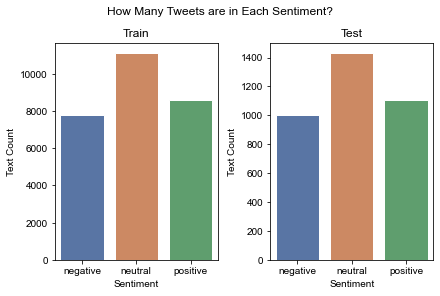

In [15]:
## Tweet Counts By Sentiment
fig, ax = plt.subplots(1, 2, constrained_layout = True )
fig.suptitle('How Many Tweets are in Each Sentiment?') 
PlotSentimentCount(train_text_sentiment_count, 0, 'Train')
PlotSentimentCount(test_text_sentiment_count, 1, 'Test') 

In [16]:
print(train_text_sentiment_count)

  sentiment   text
0  negative   7781
1   neutral  11117
2  positive   8582


In [17]:
## Most Common Words in Selected Text 
import numpy as np
import collections

def Words(data): 

    ## Word Counts 

    words = data.clean_text.apply(lambda x: str(x).split())
    words = collections.Counter([item for sublist in words for item in sublist]) 
    words = pd.DataFrame(words, index = [0]).T 
    words.columns = ['Count'] 
    words = words.sort_values(by = 'Count', ascending = False) 
    words = words[(words.index != '*')]
    words = words[(words.index != "`")]
    return words.head(20)

train_neutral_words = Words(train_neutral_text)
train_positive_words = Words(train_positive_text) 
train_negative_words = Words(train_negative_text) 
train_words = Words(train)



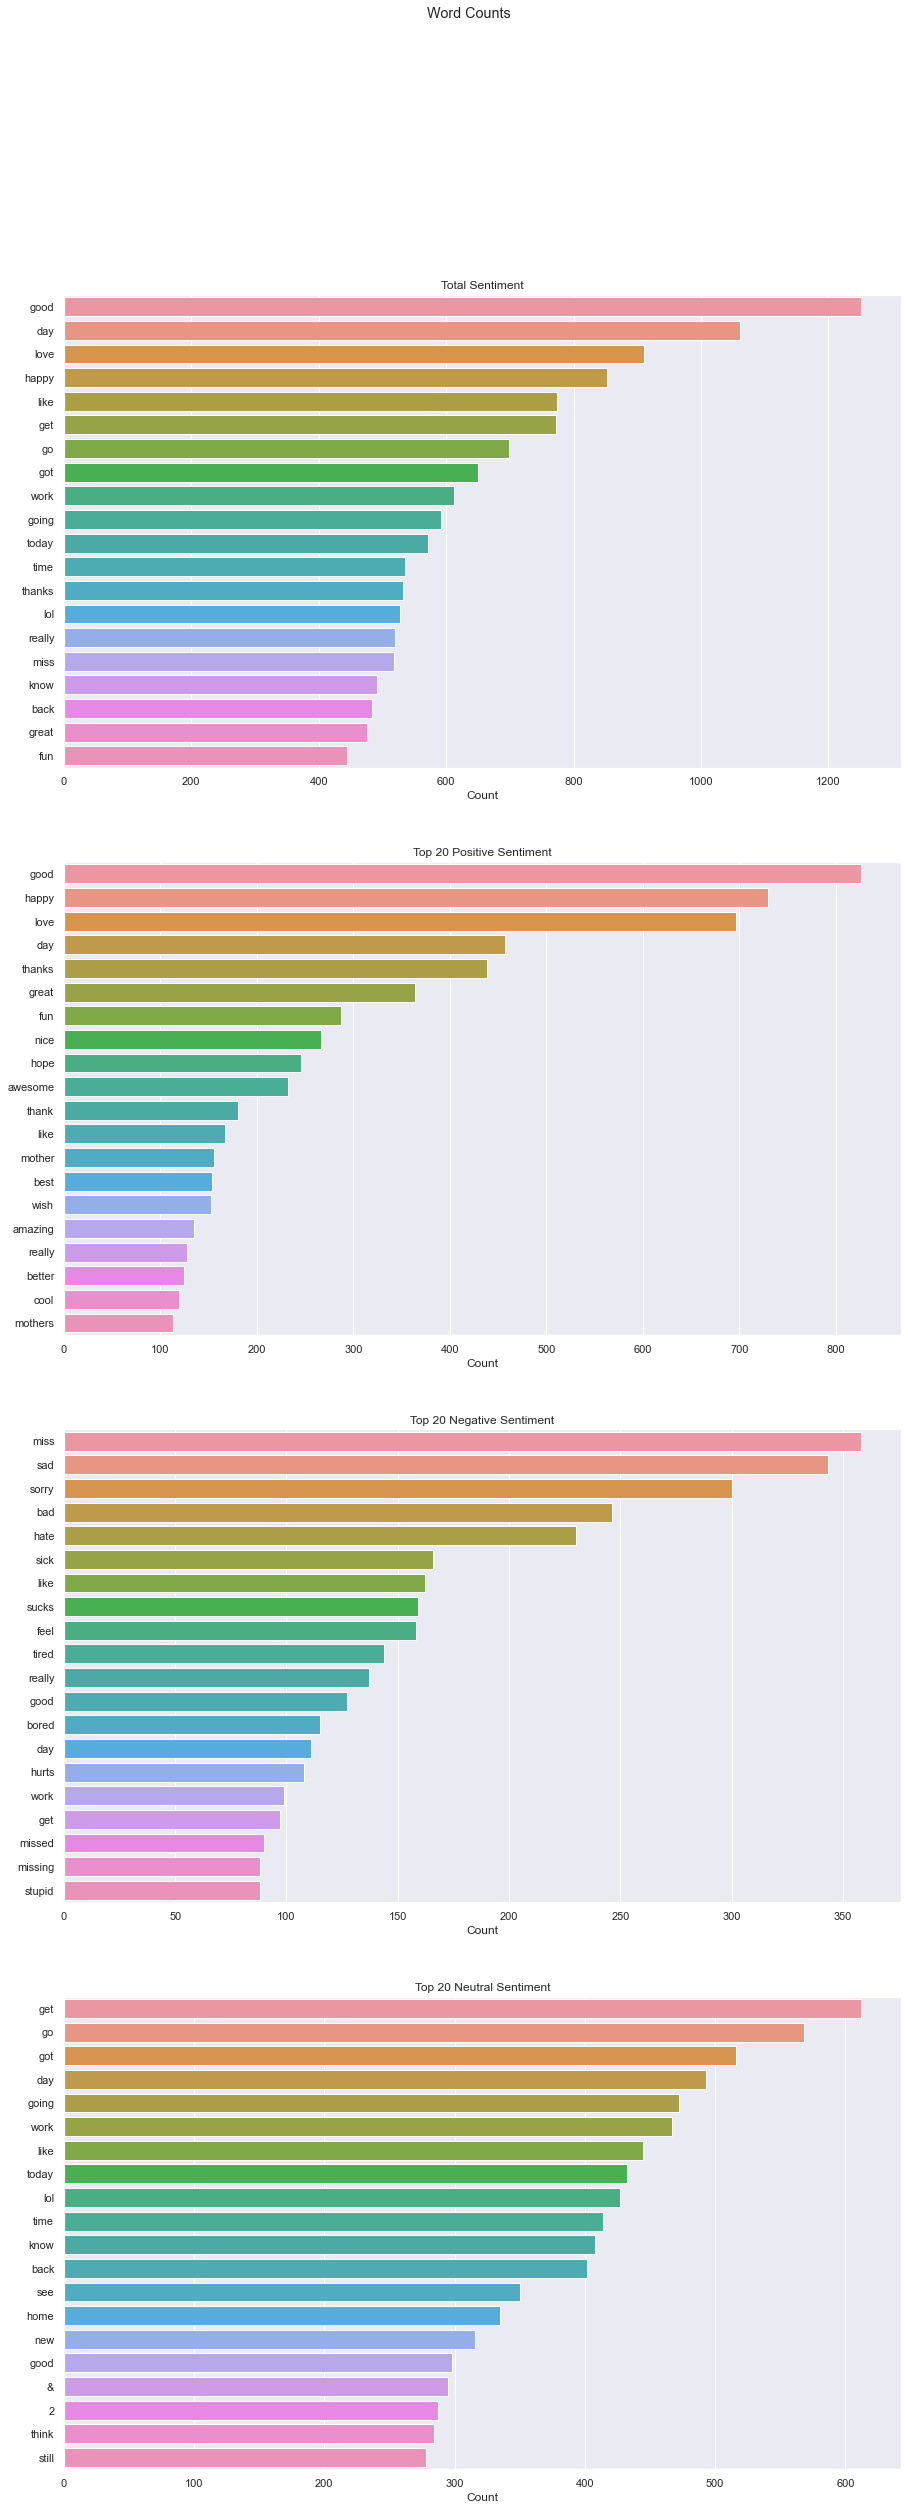

In [18]:
fig, ax = plt.subplots(4,1, figsize = (15, 40))
fig.suptitle('Word Counts')

def PopularWords(data, axis, title): 

    ## Plot the Word Counts

    sns.barplot(x = data.Count, y = data.index, ax = ax[axis])
    ax[axis].set_title('{} Sentiment'.format(title))

PopularWords(train_words, 0, 'Total')
PopularWords(train_positive_words, 1, 'Top 20 Positive') 
PopularWords(train_negative_words, 2, 'Top 20 Negative') 
PopularWords(train_neutral_words, 3, 'Top 20 Neutral') 

fig.savefig('WordCounts.jpg')



In [19]:
## Word Distribution Descriptive Stats

words_distribution_description = train_positive_words.describe().T

words_distribution_description = words_distribution_description.append(train_negative_words.describe().T) 

words_distribution_description = words_distribution_description.append(train_neutral_words.describe().T) 
words_distribution_description = words_distribution_description.append(train_words.describe().T)

words_distribution_description.index = ['Positive', 'Negative', 'Neutral', 'Train']

words_distribution_description['Sentiment'] = words_distribution_description.index

words_distribution_description

,count,mean,std,min,25%,50%,75%,max,Sentiment
Positive,20.0,298.70,220.910103,113.0,147.75,206.0,382.75,826.0,Positive
Negative,20.0,166.30,84.542795,88.0,105.75,140.5,182.00,358.0,Negative
Neutral,20.0,404.95,98.626608,278.0,311.50,411.0,468.25,612.0,Neutral
Train,20.0,663.65,215.213548,445.0,519.50,581.5,772.50,1251.0,Train


<AxesSubplot:xlabel='Sentiment', ylabel='mean'>

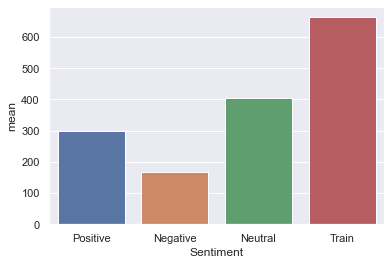

In [20]:
## Bar plot of the mean of the word count by sentiment. 
sns.barplot(x = 'Sentiment', y = 'mean', data = words_distribution_description) 

In [21]:
## Calculate the means of the number of characters of tweets based by sentiment


positive_means = [train_positive_text.number_characters.mean(), train_positive_text.number_clean_characters.mean()] 
negative_means = [train_negative_text.number_characters.mean(), train_negative_text.number_clean_characters.mean()] 
neutral_means = [train_neutral_text.number_characters.mean(), train_neutral_text.number_clean_characters.mean()] 
train_means = [train.number_characters.mean(), train.number_clean_characters.mean()]


means = {'Positive Mean': positive_means, 
            'Negative Mean': negative_means, 
            'Neutral Mean': neutral_means, 
            'Total Mean': train_means}
means = pd.DataFrame(means).transpose()
means.columns = ['NumberCharacters', 'NumberCleanCharacters']
means

,NumberCharacters,NumberCleanCharacters
Positive Mean,18.124680,12.879748
Negative Mean,19.970698,13.398406
Neutral Mean,62.765134,38.645318
Total Mean,36.706623,23.450036


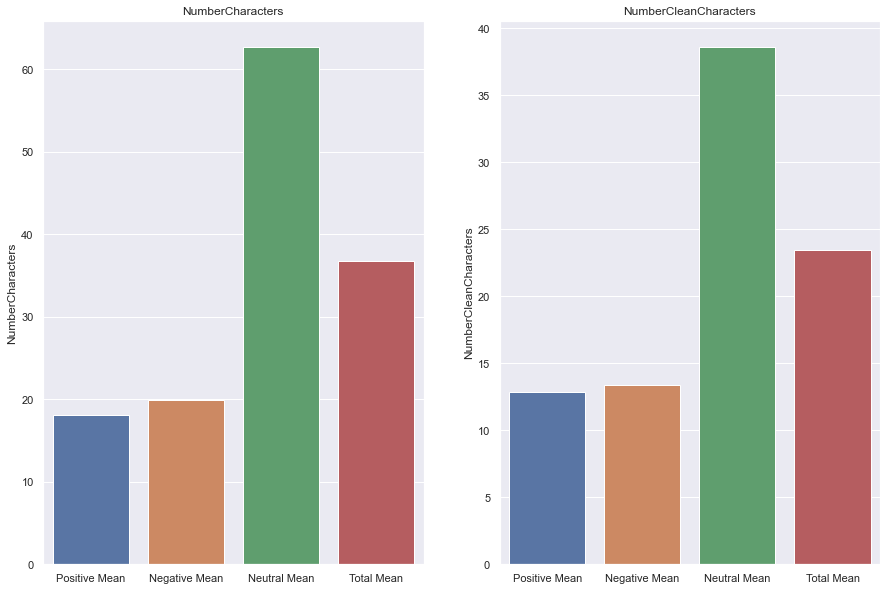

In [22]:
fig, ax = plt.subplots(1,2, figsize = (15, 10) )

def PlotMeans(data, clean_or_dirty, axis): 
    
    ## Means of the character count

    sns.barplot(x = data.index, y = data[clean_or_dirty], ax = ax[axis] ).set_title(clean_or_dirty)

j = 0
for column in means.columns: 
    PlotMeans(means, column, j)
    j+=1




Text(0.5, 1.0, 'Train Uncleaned')

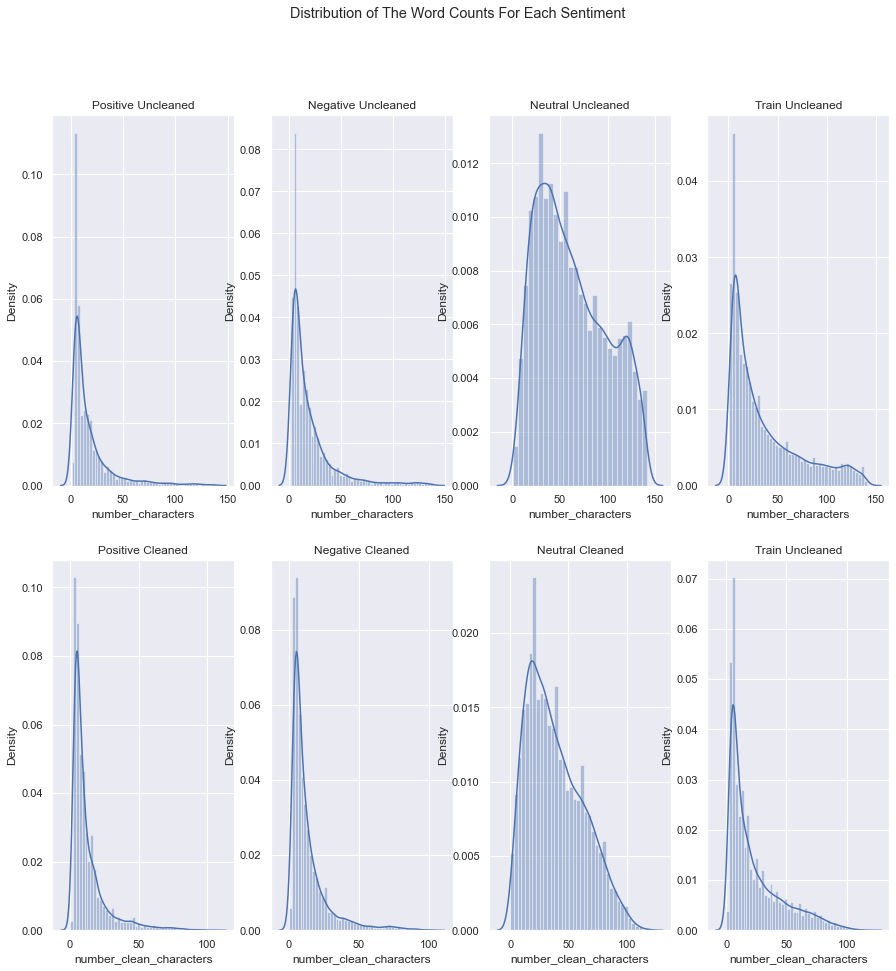

In [23]:
## Distribution of the Word Counts for each sentiment

fig, ax = plt.subplots(2, 4, figsize = (15, 15))
plt.suptitle('Distribution of The Word Counts For Each Sentiment')



sns.distplot(train_positive_text.number_characters, ax = ax[0,0]).set_title('Positive Uncleaned') 
sns.distplot(train_negative_text.number_characters, ax = ax[0,1]).set_title('Negative Uncleaned') 
sns.distplot(train_neutral_text.number_characters, ax = ax[0,2]).set_title('Neutral Uncleaned') 
sns.distplot(train.number_characters, ax = ax[0,3]).set_title('Train Uncleaned') 


sns.distplot(train_positive_text.number_clean_characters, ax = ax[1,0]).set_title('Positive Cleaned') 
sns.distplot(train_negative_text.number_clean_characters, ax = ax[1,1]).set_title('Negative Cleaned') 
sns.distplot(train_neutral_text.number_clean_characters, ax = ax[1,2]).set_title('Neutral Cleaned') 
sns.distplot(train.number_clean_characters, ax = ax[1,3]).set_title('Train Uncleaned') 